In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [139]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [140]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [141]:
data2 = data.copy()


In [142]:
attributes= ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
             'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
             'PaperlessBilling','PaymentMethod','Churn']
data_cat = data[attributes]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data_encoder = ordinal_encoder.fit_transform(data_cat)
data2[attributes] = data_encoder

In [143]:
data2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,5575-GNVDE,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.5,0.0
2,3668-QPYBK,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,7795-CFOCW,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,9237-HQITU,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.5,0.0
7039,2234-XADUH,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.9,0.0
7040,4801-JZAZL,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,8361-LTMKD,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.6,1.0


In [144]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   float64
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   float64
 4   Dependents        7043 non-null   float64
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   float64
 7   MultipleLines     7043 non-null   float64
 8   InternetService   7043 non-null   float64
 9   OnlineSecurity    7043 non-null   float64
 10  OnlineBackup      7043 non-null   float64
 11  DeviceProtection  7043 non-null   float64
 12  TechSupport       7043 non-null   float64
 13  StreamingTV       7043 non-null   float64
 14  StreamingMovies   7043 non-null   float64
 15  Contract          7043 non-null   float64
 16  PaperlessBilling  7043 non-null   float64


In [148]:
data2['TotalCharges'] = data2['TotalCharges'].astype(np.float64)

In [146]:
for i in range(len(data2['TotalCharges'])):
  if data2['TotalCharges'][i] == ' ':
    data2['TotalCharges'][i] = 0
  else :
     data2['TotalCharges'][i] = float(data2['TotalCharges'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [149]:
data2['TotalCharges'].dtype

dtype('float64')

In [150]:
data2['TotalCharges'].mean()

2279.734303563826

In [151]:
data_Total = data2['TotalCharges'].sort_values()

In [158]:
findzero = np.where(data2['TotalCharges'] == 0)
findzero = np.array(findzero)
findzero[0] - 1

array([ 487,  752,  935, 1081, 1339, 3330, 3825, 4379, 5217, 6669, 6753])

In [164]:
a = np.array(data2['TotalCharges'][findzero[0] - 1])
b = np.array(data2['TotalCharges'][findzero[0] + 1])
sum = (a + b) / 2
sum

array([3138.15 ,  353.125,  371.275, 2368.025, 3651.35 , 2479.8  ,
        533.25 , 5245.075,  145.375, 4794.725, 3564.4  ])

In [165]:
data2['TotalCharges'][findzero[0]] = sum

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [166]:
data2['TotalCharges'].mean()

2283.517428652566

In [167]:
data_corr = data2.corr()
data_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000582,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102304,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318840,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064651,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824239,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112357,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.453001,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175896,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254144,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375364,-0.195525


In [169]:
data_corr['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199390
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6edb8e75c0>,
      dtype=object)

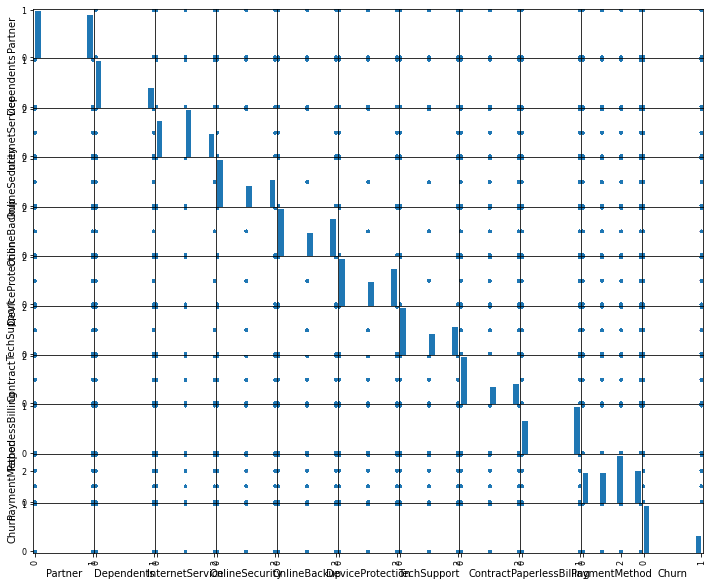

In [170]:
cor_attribute=['Partner','Dependents','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling','PaymentMethod','Churn']

from pandas.plotting import scatter_matrix

scatter_matrix(data2[cor_attribute],figsize=(12,10))

In [176]:
real_data = data2[cor_attribute].copy()
real_data

,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Churn
0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0
2,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,0.0,2.0,0.0,2.0,2.0,1.0,1.0,3.0,0.0
7039,1.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0
7040,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
7041,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0


In [178]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(real_data, test_size = 0.2)

train_y = train_set['Churn']
del train_set['Churn']

test_y = test_set['Churn']
del test_set['Churn']

In [185]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(train_set,train_y)
some_data = train_set.iloc[6:10]
some_labels = train_y.iloc[6:10]
print("예측:", clf.predict(some_data))
print("레이블:", list(some_labels))

예측: [1. 0. 0. 0.]
레이블: [0.0, 0.0, 0.0, 0.0]


In [179]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth = 10)

tree_clf.fit(train_set,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [180]:
some_data = train_set.iloc[6:10]
some_labels = train_y.iloc[6:10]
print("예측:", tree_clf.predict(some_data))
print("레이블:", list(some_labels))

예측: [1. 0. 0. 0.]
레이블: [0.0, 0.0, 0.0, 0.0]


In [181]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_set, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [182]:
some_data = train_set.iloc[6:10]
some_labels = train_y.iloc[6:10]
print("예측:", knn.predict(some_data))
print("레이블:", list(some_labels))

예측: [1. 0. 0. 0.]
레이블: [0.0, 0.0, 0.0, 0.0]


In [186]:
predictions = clf.predict(train_set)
tree_mse = mean_squared_error(train_y, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.4732833824458625

In [183]:
from sklearn.metrics import mean_squared_error
predictions = tree_clf.predict(train_set)
tree_mse = mean_squared_error(train_y, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.4267418730310902

In [184]:
predictions = knn.predict(train_set)
knn_mse = mean_squared_error(train_y, predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.44962809544127985

In [187]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_clf, train_set, train_y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [0.5070426  0.49644124 0.5        0.5        0.49149065 0.49509136
 0.46550647 0.49688193 0.50044385 0.47681596]
평균: 0.4929714052787898
표준 편차: 0.011840516149922523


In [188]:
scores = cross_val_score(clf, train_set, train_y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

점수: [0.48560849 0.47825036 0.46699583 0.49285678 0.47307617 0.4786749
 0.44602049 0.47494975 0.4786749  0.46359473]
평균: 0.47387024005447065
표준 편차: 0.012222429814059412


In [189]:
scores = cross_val_score(knn, train_set, train_y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

점수: [0.50353361 0.51571062 0.50353361 0.5        0.48968036 0.50221534
 0.45586761 0.49509136 0.4842089  0.46930658]
평균: 0.49191479988105236
표준 편차: 0.017007945740320284


In [190]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=5, random_state=42)
forest_clf.fit(train_set, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [191]:
some_data = train_set.iloc[6:10]
some_labels = train_y.iloc[6:10]
print("예측:", forest_clf.predict(some_data))
print("레이블:", list(some_labels))

예측: [1. 0. 0. 0.]
레이블: [0.0, 0.0, 0.0, 0.0]


In [192]:
scores = cross_val_score(forest_clf, train_set, train_y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

점수: [0.5        0.50353361 0.4982238  0.51052747 0.48603956 0.5039806
 0.48968036 0.51271575 0.51616842 0.5057397 ]
평균: 0.5026609283198042
표준 편차: 0.009104668395071739


In [194]:
print("결정트리 훈련 세트의 정확도:",tree_clf.score(train_set,train_y))
print("랜덤포레스트 훈련 세트의 정확도:",forest_clf.score(train_set,train_y))
print('Kneighbor 훈련 세트의 정확도 : ', knn.score(train_set,train_y))
print('로지스틱 훈련 세트의 정확도 : ', clf.score(train_set,train_y))

print("결정트리 테스트 세트의 정확도:",tree_clf.score(test_set,test_y))
print("랜덤포레스트 테스트 세트의 정확도:",forest_clf.score(test_set,test_y))
print('Kneighbor 테스트 세트의 정확도 : ', knn.score(test_set,test_y))
print("로지스틱 테스트 세트의 정확도:",clf.score(test_set,test_y))

결정트리 훈련 세트의 정확도: 0.8178913738019169
랜덤포레스트 훈련 세트의 정확도: 0.8194888178913738
Kneighbor 훈련 세트의 정확도 :  0.7978345757898474
로지스틱 훈련 세트의 정확도 :  0.7760028399006035
결정트리 테스트 세트의 정확도: 0.7693399574166075
랜덤포레스트 테스트 세트의 정확도: 0.7537260468417317
Kneighbor 테스트 세트의 정확도 :  0.7686302342086586
로지스틱 테스트 세트의 정확도: 0.7785663591199432
